In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1. Data Description
## 1.1 The dataset 'players.csv' describes 196 unique players, including data about each player.
Numbers of observations: 196,
numbers of variables: 7

|Variable     |   Type    |     Description  |
|-------------|-----------|------------------------------|
|experience   | Character |Player's experience level|
|hashedEmail  | Character |Player's ID|
|name         | Character |  Player's name               |
|gender       | Character  | Player's gender|
|played_hours | Double      |Player's playtime (in hours)|
|Age           |Double     | Player's age|
|subscribe     |Logical     |Whether the player subscribed to the newsletter|

In [3]:
#Players Summary Statistics
summary_players <- summary(players)
summary_players

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

#### Issues
- Age has 2 NAs.
- The minimum value of played_hours is 0, showing that some players never played or their playtime didn't record.
- The experience level, gender, and age are self-reported, which may result in a lying and inaccurate answers.

## 1.2 The dataset 'sessions.csv' describes individual play sessions by each player, including data about the session.
Numbers of observations: 1535,
numbers of variables: 5

|Variable     |   Type    |     Description  |
|-------------|-----------|------------------------------|
|hashedEmail  |Character |Player's ID|
|start_time         |Character |session start in readable time format  |
|end_time        |Character |session end in readable time format  |
|original_start_time | Double|session start time in UNIX time (milliseconds)|
|original_end_time | Double|session end time in UNIX time (milliseconds)|

In [11]:
#Sessions Summary Statistics
summary_sessions <- summary(sessions)
summary_sessions

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

#### Issues
- original_end_time has 2 NAs.

# 2. Questions
### 2.1 Board question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### 2.2 Specific question
Can a player's experience level, average playtime, gender, and age predict subscription numbers?
### 2.3 Data wrangling plan
- remove 'NA' values in 'Age' 
- convert 'experience' and 'gender' variables to factor 
- simplify the data by dropping 'hashedEmail' and 'name'

# 3. Exploratory Data Analysis and Visualization
## 3.1 Demonstrate the dataset in R

In [12]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 3.2 Minimum wrangling

In [13]:
players_clean <- players |>
    filter(!is.na(Age)) |>
    mutate(experience = as.factor(experience), gender = as.factor(gender)) |>
    select(experience, gender, Age, played_hours, subscribe)
players_clean

experience,gender,Age,played_hours,subscribe
<fct>,<fct>,<dbl>,<dbl>,<lgl>
Pro,Male,9,30.3,TRUE
Veteran,Male,17,3.8,TRUE
Veteran,Male,17,0.0,FALSE
⋮,⋮,⋮,⋮,⋮
Veteran,Male,22,0.3,FALSE
Amateur,Prefer not to say,57,0.0,FALSE
Amateur,Male,17,2.3,FALSE


## 3.3 Compute the mean value

In [14]:
# use summarise to calculate the mean value for Age and played_hours
mean <- players_clean |>
    summarise(mean_age = mean(Age), mean_playedhrs = mean(played_hours))
mean

mean_age,mean_playedhrs
<dbl>,<dbl>
21.13918,5.904639


|mean age |mean played hours|
|---------|-----------------|
|21.14|5.90|

## 3.4 Make a few exploratory visualizations
### 3.4.1 Proportion of Newsletter Subscription by Experience

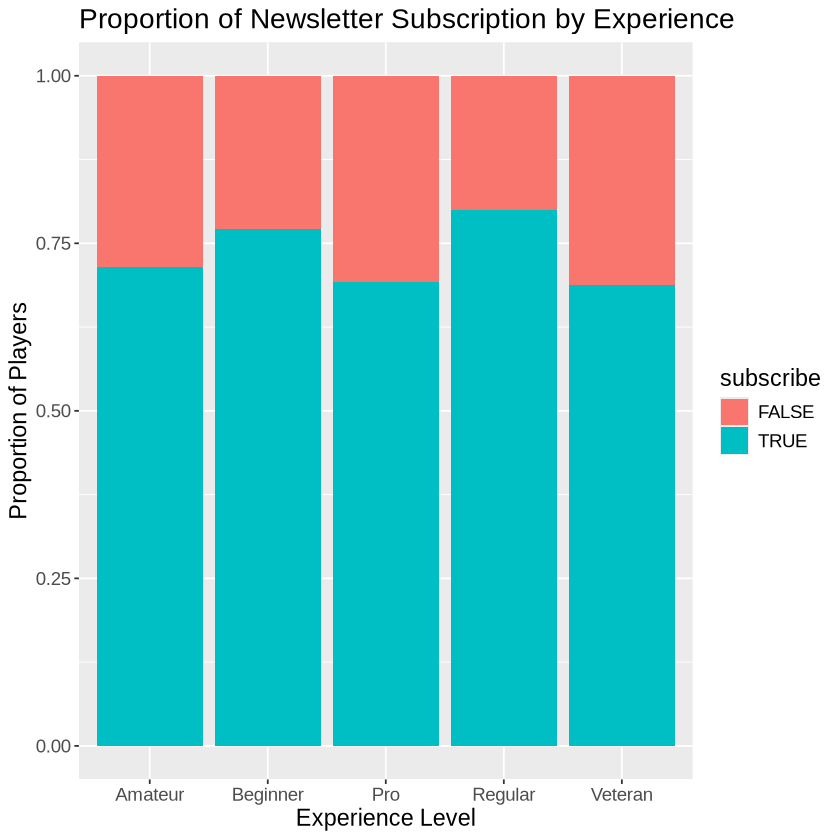

In [15]:
#use bar chart to show the relationship between experience and subscribe
ggplot(players_clean, aes(x=experience, fill = subscribe)) +
    geom_bar(position="fill") +
    theme(text = element_text(size = 14)) +
    labs(title = "Proportion of Newsletter Subscription by Experience", x = "Experience Level", y = "Proportion of Players")

**Insight:**
From the above graph, we can see that regular and beginner have relatively higher subscription rates compared to others. This shows that players who subscribed to the newsletter has barely any relationship with experience level.

### 3.4.2 Average Playtime by Subscription

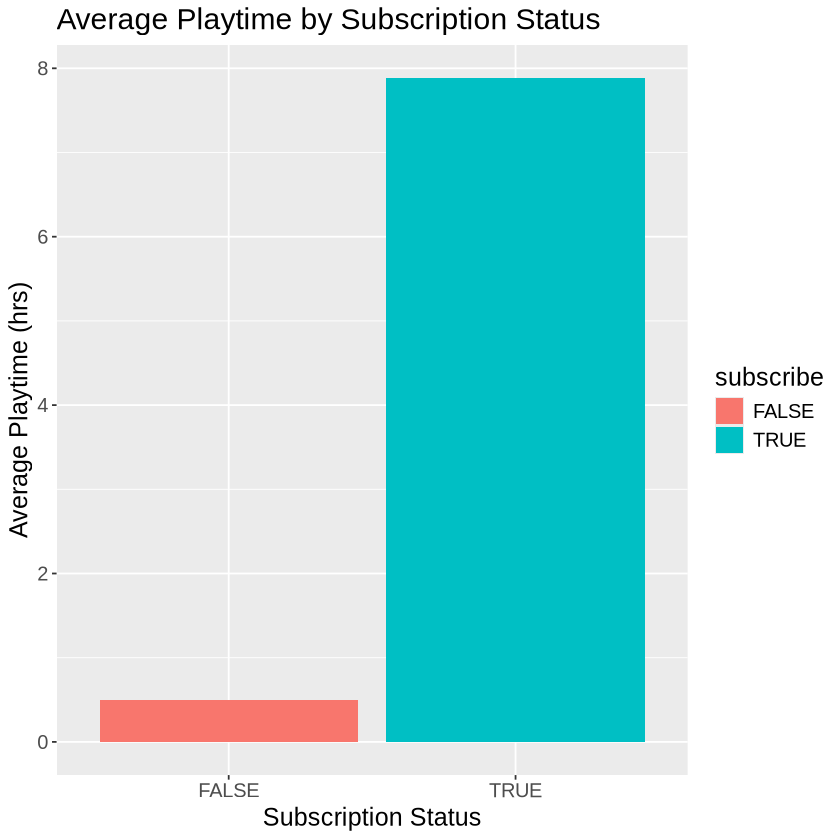

In [16]:
#calculate the average playtime first, then draw a bar chart
avg_hrs <- players_clean |>
    group_by(subscribe) |>
    summarise(mean_hrs = mean(played_hours, na.rm = TRUE))

ggplot(avg_hrs, aes(x=subscribe, y=mean_hrs, fill = subscribe)) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 15)) +
    labs(title = "Average Playtime by Subscription Status", x="Subscription Status", y="Average Playtime (hrs)")

**Insight:**
According to the graph, players who subscribed to the newsletter played around 8 hours, while non-subscriber played less than 1 hour. This indicates that playtime has a positive relationship with newsletter subscription, where more active players are likely to subscribe.

### 3.4.3 Newsletter Subscription by Gender

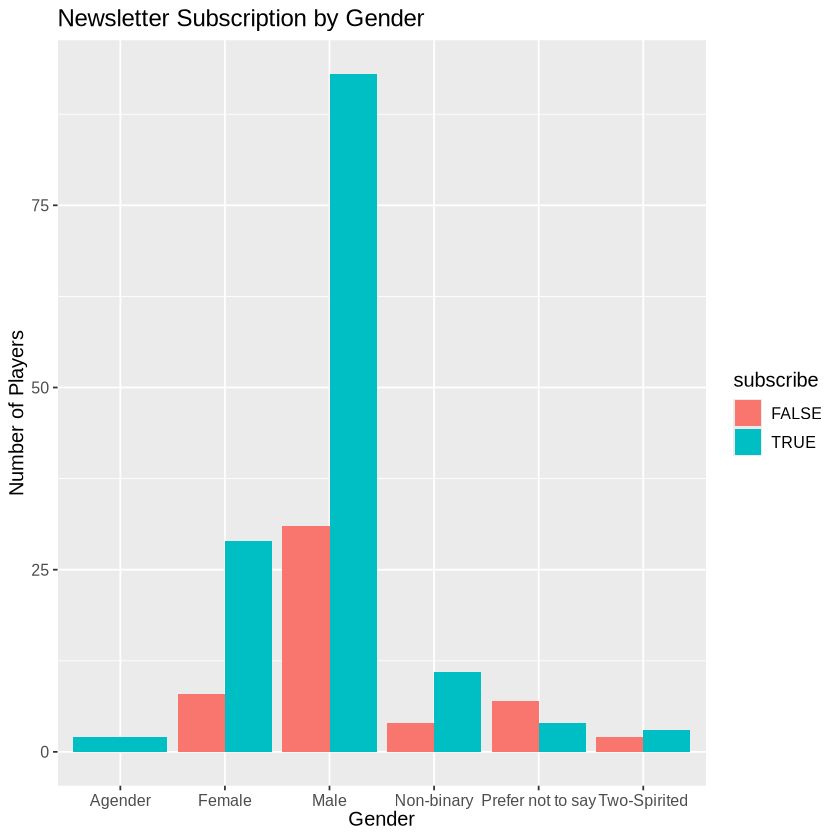

In [17]:
#use bar chart to show the relationship between gender and subscription
ggplot(players_clean, aes(x=gender, fill = subscribe)) +
    geom_bar(position="dodge") +
    theme(text = element_text(size = 12)) +
    labs(title = "Newsletter Subscription by Gender", x = "Gender", y = "Number of Players") 

**Insight:**
From the graph, we can see that everyone who selected agender subscribe the newsletter because of the small amount of people. Also, people who selected prefer not to say and two-spirited tends to have a lower subscription rates due to small sample size. Therefore, these may not be meaningful statistics. 

# 4. Methods and Plan


To address my question, I will use **k-nearest neighbors classification** because it predicts a categorical class for an observation given its other variables. Here, the subscription variable is logical, giving a True or False answer, which can be a kind of binary categorical class. 
- The assumptions are not required in this method.
- The potential limitations are [1] require scaling or it will perform badly, [2] if the class is imbalanced, it will also perform badly, [3] if there's missing data, it may result in inaccuracy.
- Due to several limitations, I will scale and center my data before modeling.
- use 5-fold cross-validation and accuracy to compare different k values in the training set. Then, the model with the highest validation score will be the final model.
- split the data to 75% training and 25% testing sets before standardizing them. 